![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [2]:
# Start coding here
# Use as many cells as you need

In [3]:
# Convert TIME OCC to int and get the first two digits as the hour
crimes['HOUR OCC'] = crimes['TIME OCC'].str[:2].astype(int)

# Count the frequency of each hour
hourly_crime_counts = crimes['HOUR OCC'].value_counts()

# Find the hour with the highest frequency
peak_crime_hour = hourly_crime_counts.idxmax()

print("The hour with the highest frequency of crimes is:", peak_crime_hour)

The hour with the highest frequency of crimes is: 12


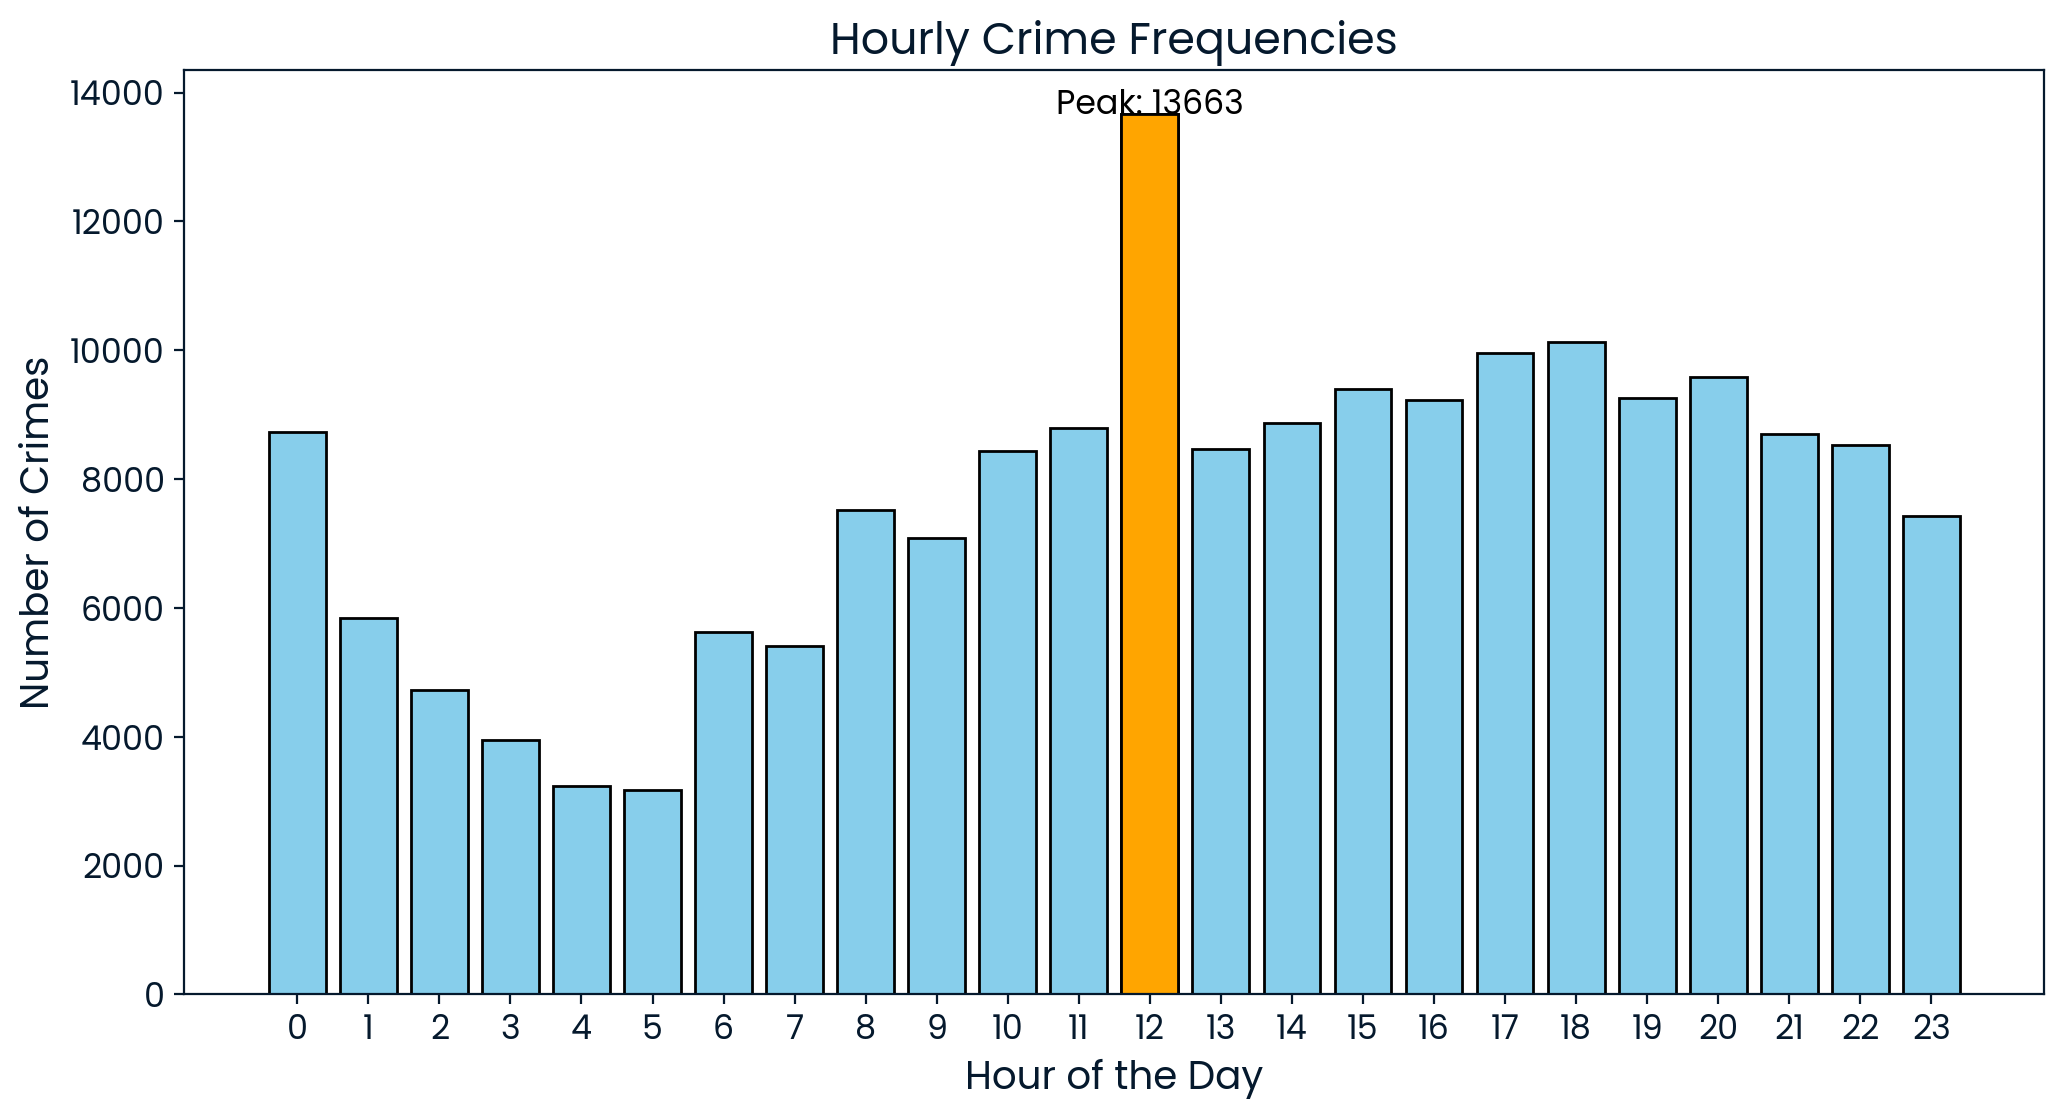

In [4]:
# Plotting the frequencies per hour

# Find the peak crime hour
peak_crime_hour = hourly_crime_counts.idxmax()

# Plot the hourly crime frequencies
plt.figure(figsize=(12, 6))
plt.bar(hourly_crime_counts.index, hourly_crime_counts.values, color="skyblue", edgecolor="black")
plt.title("Hourly Crime Frequencies", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=14)
plt.ylabel("Number of Crimes", fontsize=14)
plt.xticks(range(0, 24), fontsize=12)  # Ensure all hours are displayed
plt.yticks(fontsize=12)

# Highlight the peak crime hour
plt.bar(peak_crime_hour, hourly_crime_counts[peak_crime_hour], color="orange", edgecolor="black")
plt.text(
    peak_crime_hour,
    hourly_crime_counts[peak_crime_hour] + 5,
    f"Peak: {hourly_crime_counts[peak_crime_hour]}",
    ha="center",
    fontsize=12,
    color="black"
)

plt.show()

We now need to figure out the area that has the largest frequency of crimes committed at night. Here, we define night as times between 10:00pm and 3:49am. 

We will save this value as peak_night_crime_location

In [5]:
# Convert 'TIME OCC' to integer
crimes['TIME OCC'] = crimes['TIME OCC'].str[:4].astype(int)

# Filter for night crimes (10 PM to 3:59 AM)
night_crimes = crimes[
    (crimes['TIME OCC'] >= 2200) | (crimes['TIME OCC'] <= 359)
]

# Group by 'AREA NAME' and count the frequency
area_night_crime_counts = night_crimes['AREA NAME'].value_counts()

# Get the area with the highest frequency
peak_night_crime_location = area_night_crime_counts.idxmax()

print("The area with the largest frequency of night crimes is:", peak_night_crime_location)


The area with the largest frequency of night crimes is: Central


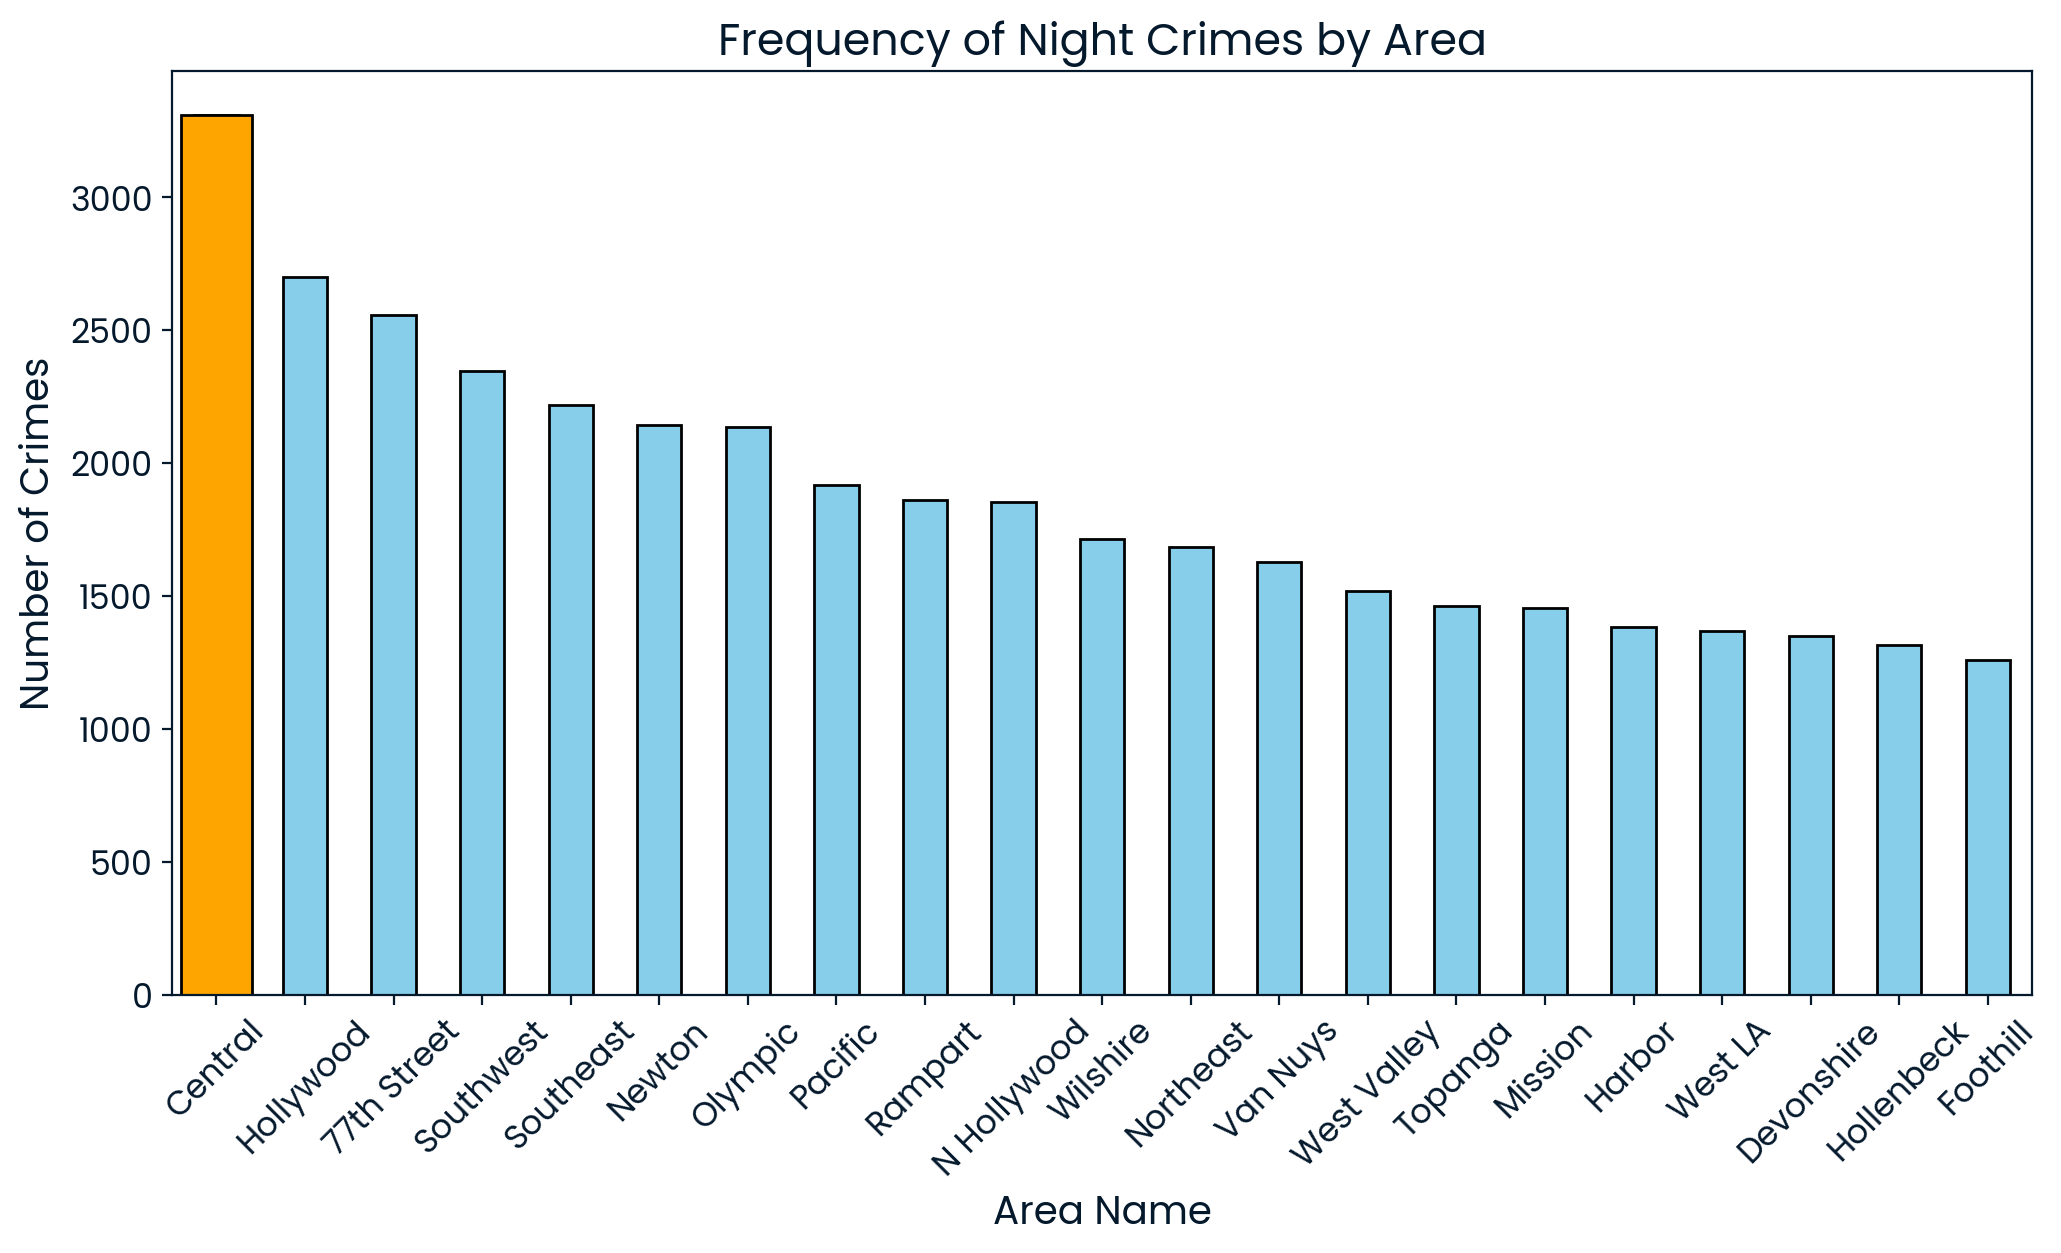

In [6]:
# Plotting on a graph
plt.figure(figsize=(12, 6))
area_night_crime_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Highlight the peak area
peak_area = area_night_crime_counts.idxmax()
peak_value = area_night_crime_counts.max()
plt.bar(peak_area, peak_value, color='orange', edgecolor='black')

# Add labels and title
plt.title("Frequency of Night Crimes by Area", fontsize=16)
plt.xlabel("Area Name", fontsize=14)
plt.ylabel("Number of Crimes", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Now, I categorize the crimes into age groupings. The labels are "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" 

In [9]:
# I defined the age group bins and labels
age_bins = [0, 17, 25, 34, 44, 54, 64, float('inf')]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Then bin the 'Vict Age' column into defined age groups
crimes['Age Group'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels, right=True)

# I counted the frequency of crimes for each age group
victim_ages = crimes['Age Group'].value_counts()

# Then sorted the series by the defined age groups
victim_ages = victim_ages.reindex(age_labels)

# Finally, displayed the resulting Series
print(victim_ages)

# I displayed the sum all the values in the bins
total_crimes = victim_ages.sum()

print("Total number of crimes across all age groups:", total_crimes)

0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: Age Group, dtype: int64
Total number of crimes across all age groups: 185715


From the data, we can see the most affected age group of crimes in Los Angelos is 26-34. This is closely followed by 35-44. It then proceeds to steadily decline.

These two bins alone account for 48.26% of the total crimes. Interesting huh. Since I am in the highest bracket maybe I should probably wait and age some more before visiting😂

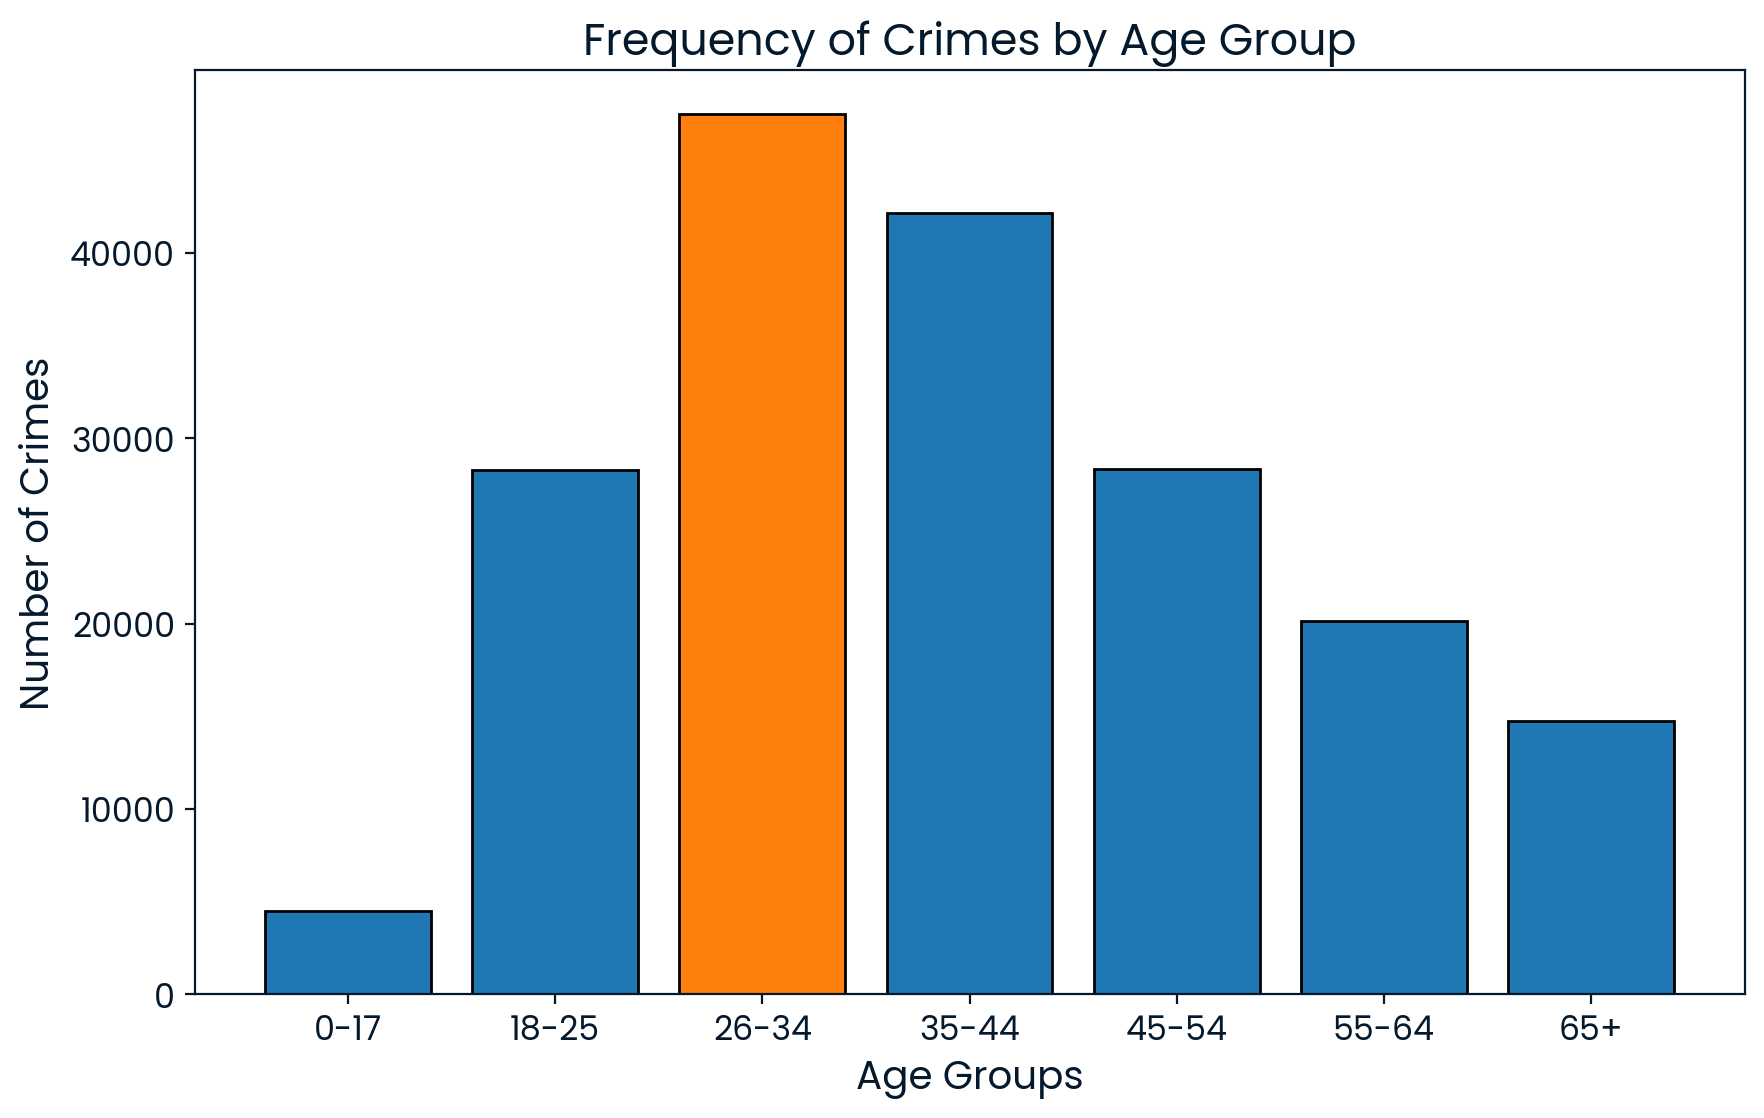

In [8]:
import matplotlib.pyplot as plt

# Define colors for the bars, with the highest bin in a deeper/more catchy color
colors = ["#1f77b4"] * len(victim_ages)  # Default color
highest_bin = victim_ages.idxmax()
colors[victim_ages.index.get_loc(highest_bin)] = "#ff7f0e"  # Highlight the highest bin

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(victim_ages.index, victim_ages.values, color=colors, edgecolor="black")
plt.title("Frequency of Crimes by Age Group", fontsize=16)
plt.xlabel("Age Groups", fontsize=14)
plt.ylabel("Number of Crimes", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()
